In [1]:
%matplotlib widget

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os

### Read In

In [3]:
datapath = "/Users/00090336/Data/gridflagtest"
# smeared_grid = np.load(os.path.join(datapath,"smeared.npy"))
vis_grid = np.load(os.path.join(datapath,"vis.npy"))
psf_grid = np.load(os.path.join(datapath,"psf.npy"))
pcf_grid = np.load(os.path.join(datapath,"pcf.npy"))
# print(f"smeared_grid: {smeared_grid.dtype}")
print(f"vis_grid: {vis_grid.shape}")
print(f"psf_grid: {psf_grid.shape}")
print(f"pcf_grid: {pcf_grid.shape}")

# smeared_grid1 = np.load("smeared_grid.npy")
vis_grid1 = np.load("vis.npy")
psf_grid1 = np.load("psf.npy")
pcf_grid1 = np.load("pcf.npy")

vis_grid: (107, 1, 1024, 1024)
psf_grid: (107, 1, 1024, 1024)
pcf_grid: (107, 1, 1024, 1024)


### Prep data

In [4]:
def smear_grid(pcf, ksize=3):
    s = np.zeros(pcf.shape, dtype=np.float32)
    pcfinite = np.isfinite(pcf)
    for f in range(pcf.shape[0]):
        for x in range(pcf.shape[1]):
            for y in range(pcf.shape[2]):
                if pcfinite[f,x,y]:
                    s[f,x-ksize:x+ksize+1, y-ksize:y+ksize+1] += pcf[f,x,y].real
    s[s == 0] = np.nan
    return s

In [5]:
v0 = vis_grid[:,0]
v0[v0 == 0] = np.nan

v1 = vis_grid1[:,0]
v1[v1 == 0] = np.nan

pc0 = pcf_grid[:,0]
pc0[pc0 == 0] = np.nan

pc1 = pcf_grid1[:, 0]
pc1[pc1 == 0] = np.nan

s0 = smear_grid(pc0)

s1 = smear_grid(pc1)

### Plot Data

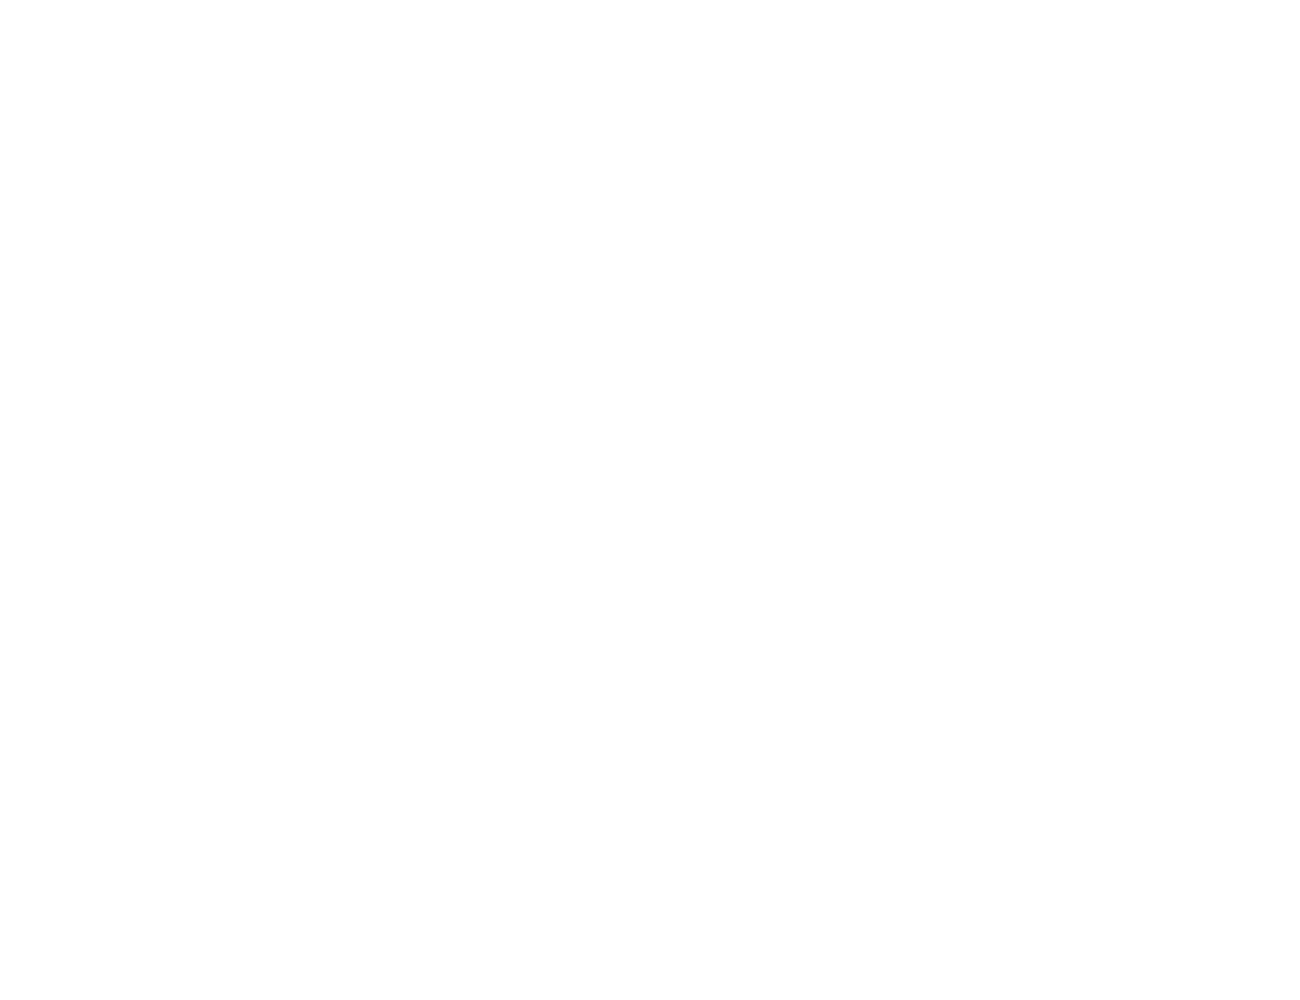

In [6]:
dfig = plt.figure(figsize=(13,10))
dfig.set_tight_layout(1)

In [32]:
dfig.clear()
ax = dfig.subplots(3,4)
titles = ("abs(vis0)", "abs(vis1)", None, None,
          "pcf0.real", "pcf1.real", "s0.real", "s1.real", 
          "abs(vis0/pcf0.real)", "abs(vis1/pcf1.real)", "abs(vis0/s0.real)", "abs(vis1/s1.real)")
arrays = (np.abs(v0[40]), np.abs(v1[40]), None, None,
          pc0[40].real, pc1[40].real, s0[40], s1[40],
          np.abs(v0[40]/pc0[40].real), np.abs(v1[40]/pc1[40].real), np.abs(v0[40]/s0[40]), np.abs(v1[40]/s1[40]))
for i, ar in enumerate(arrays):
    if ar is None:
        ax.flatten()[i].axis("off")
    else:
        ax.flatten()[i].matshow(ar)
        ax.flatten()[i].set(title=titles[i], xlim=(200,800), ylim=(200,800))

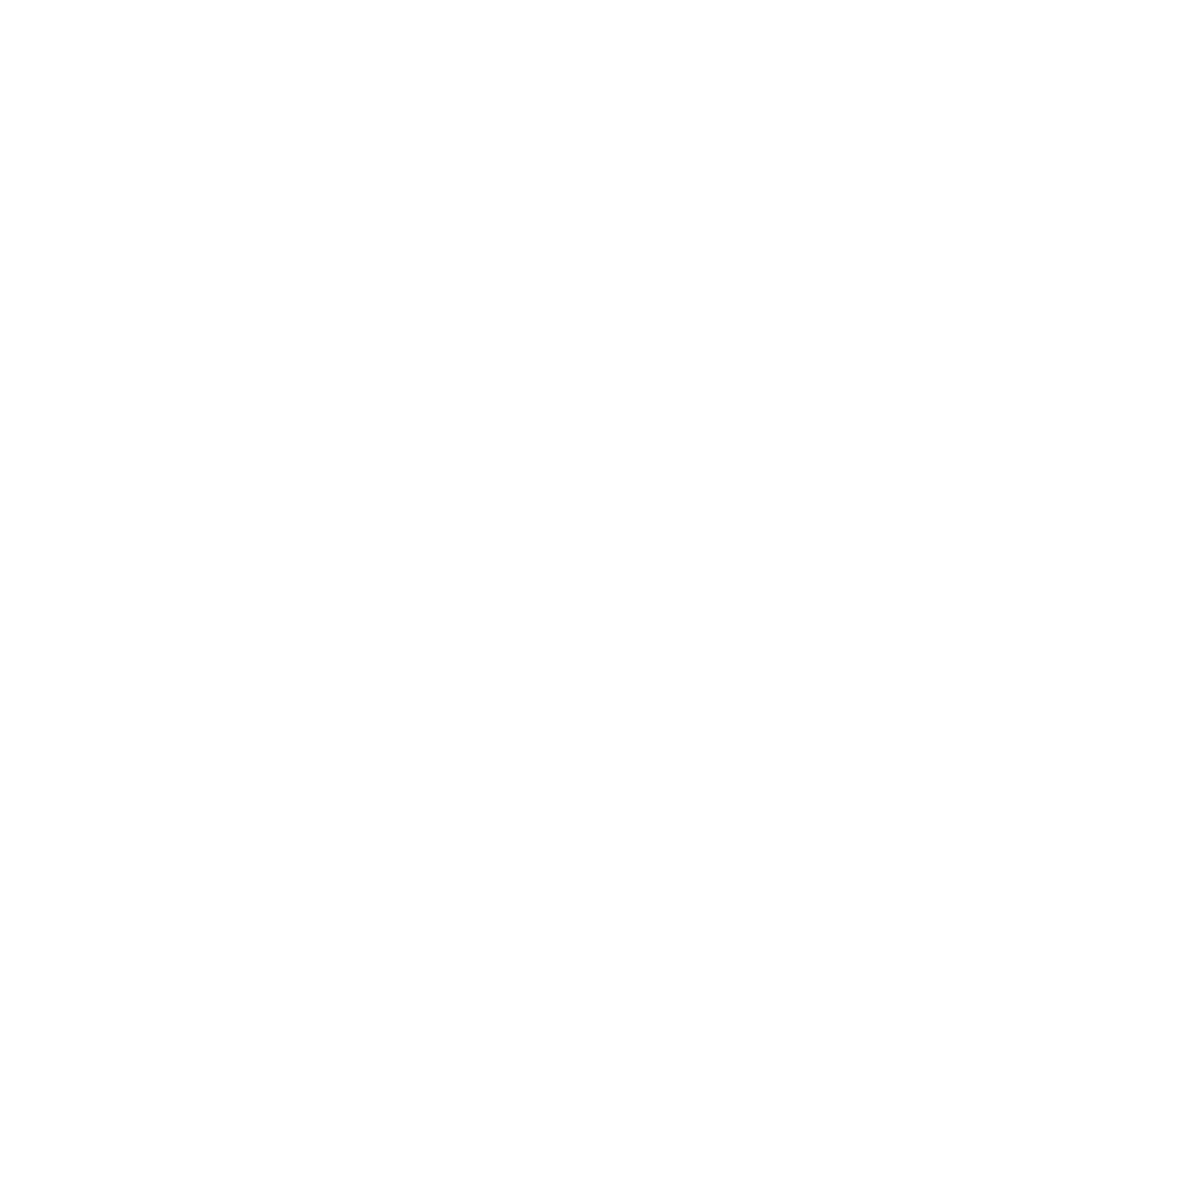

In [8]:
pcffig = plt.figure(figsize=(12,30))
pcffig.tight_layout()

In [14]:
pcffig.set_size_inches(12,30)
pcffig.tight_layout()

In [10]:
pcffig.clear()
ax = pcffig.subplots(3,1).flatten()
ax[0].matshow(np.log(np.abs(v0[0])), cmap='Greens')
ax[1].matshow(np.log(s0[0].real), cmap='Greens')
ax[2].matshow(np.isfinite(np.abs(v0[0])).astype(int)+np.isfinite(s0[0]).astype(int), cmap='Set3')
for a in ax:
    a.set(xlim=(200,800), ylim=(200,800))
    a.matshow(pc0.real[0], cmap='Reds')

### Make Histograms

In [24]:
fullarrays = (np.abs(v0), np.abs(v1), None, None,
          pc0.real, pc1.real, s0, s1,
          np.abs(v0/pc0.real), np.abs(v1/pc1.real), np.abs(v0/s0), np.abs(v1/s1))

hists = [np.histogram(x[np.isfinite(x)], 1000) if x is not None else None for x in fullarrays]
hist = np.array([x[0] if x is not None else None for x in hists])
bins = np.array([x[1] if x is not None else None for x in hists])
xvals = [(x[1:] + x[:-1])/2 if x is not None else None for x in bins]

shists = [np.histogram(x[np.isfinite(x)], 1000) if x is not None else None for x in [np.std(y, axis=0, where=np.isfinite(y)) if y is not None else None for y in fullarrays]]
shist = np.array([x[0] if x is not None else None for x in shists])
sbins = np.array([x[1] if x is not None else None for x in shists])
sxvals = [(x[1:] + x[:-1])/2 if x is not None else None for x in sbins]

/var/folders/r_/5_7vfq057t5g1s7xy9hsbhd518n8zd/T/ipykernel_25549/3777918495.py:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  hist = np.array([x[0] if x is not None else None for x in hists])
/var/folders/r_/5_7vfq057t5g1s7xy9hsbhd518n8zd/T/ipykernel_25549/3777918495.py:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  bins = np.array([x[1] if x is not None else None for x in hists])
/Users/00090336/miniconda3/envs/gridflag_nb/lib/python3.10/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, a

### Plot Histograms

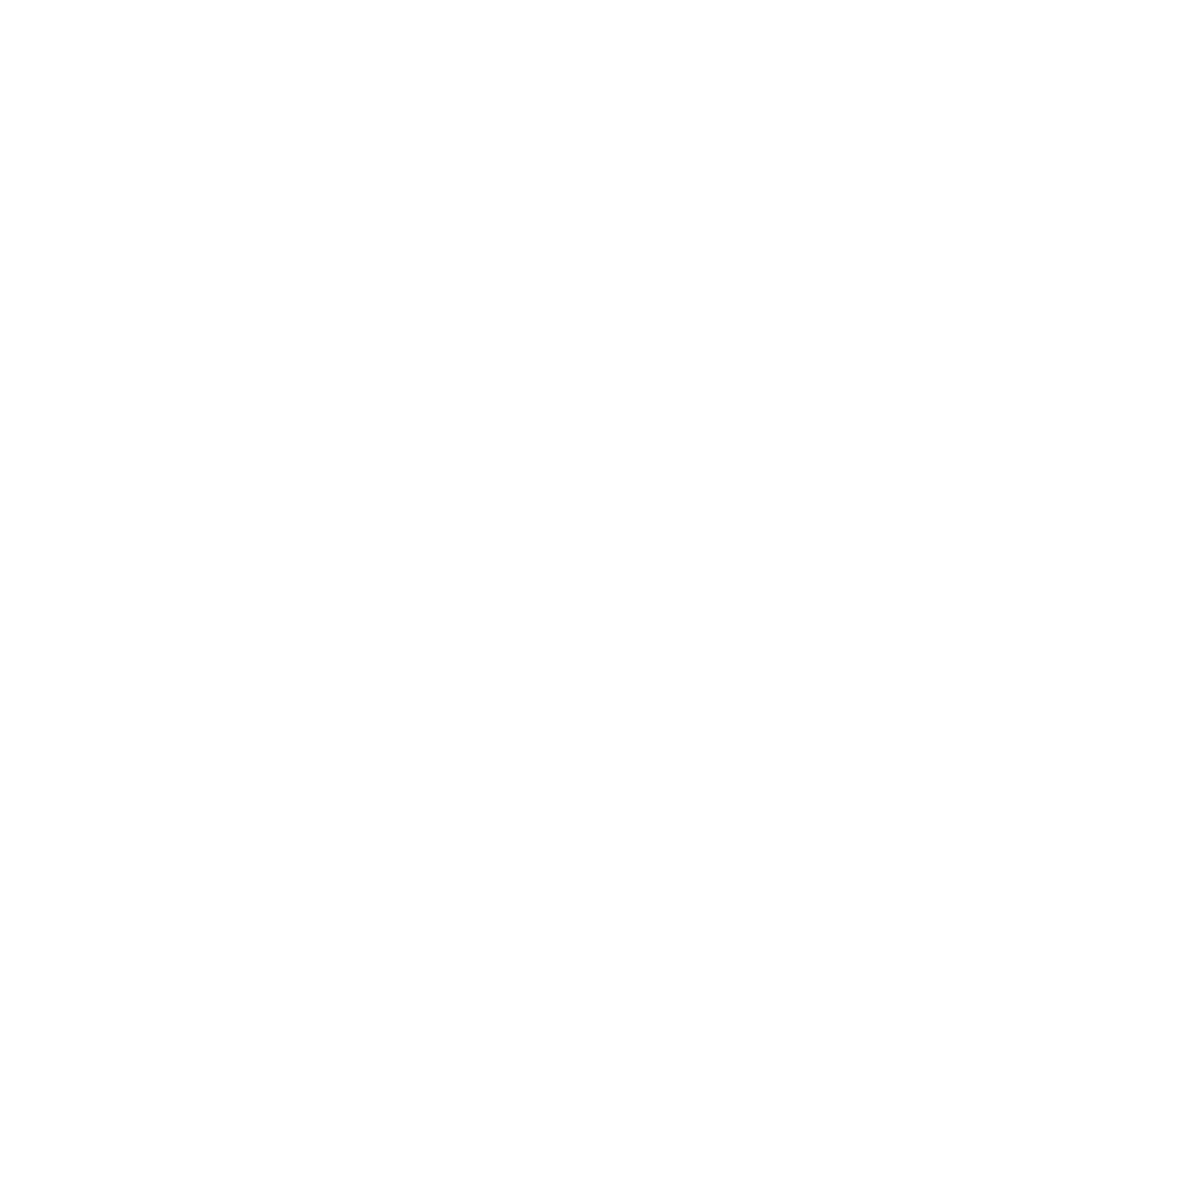

In [23]:
hfig = plt.figure(figsize=(12,12))
hfig.set_tight_layout(1)

In [30]:
hfig.set_size_inches(18,18)

In [27]:
hfig.clear()
ax = hfig.subplots(3,4)
hfig.suptitle("Pixel counts per value")

col = 'b'
for i, title in enumerate(titles):
    if hist[i] is None:
        ax.flatten()[i].axis("off")
    else:
        ax.flatten()[i].plot(xvals[i],hist[i], '.',color=col, markeredgecolor='k')
        ax.flatten()[i].step(xvals[i],hist[i], where='mid',color=col, alpha=0.2)
        ax.flatten()[i].set(yscale='log', xlim=(None,None), title=title)

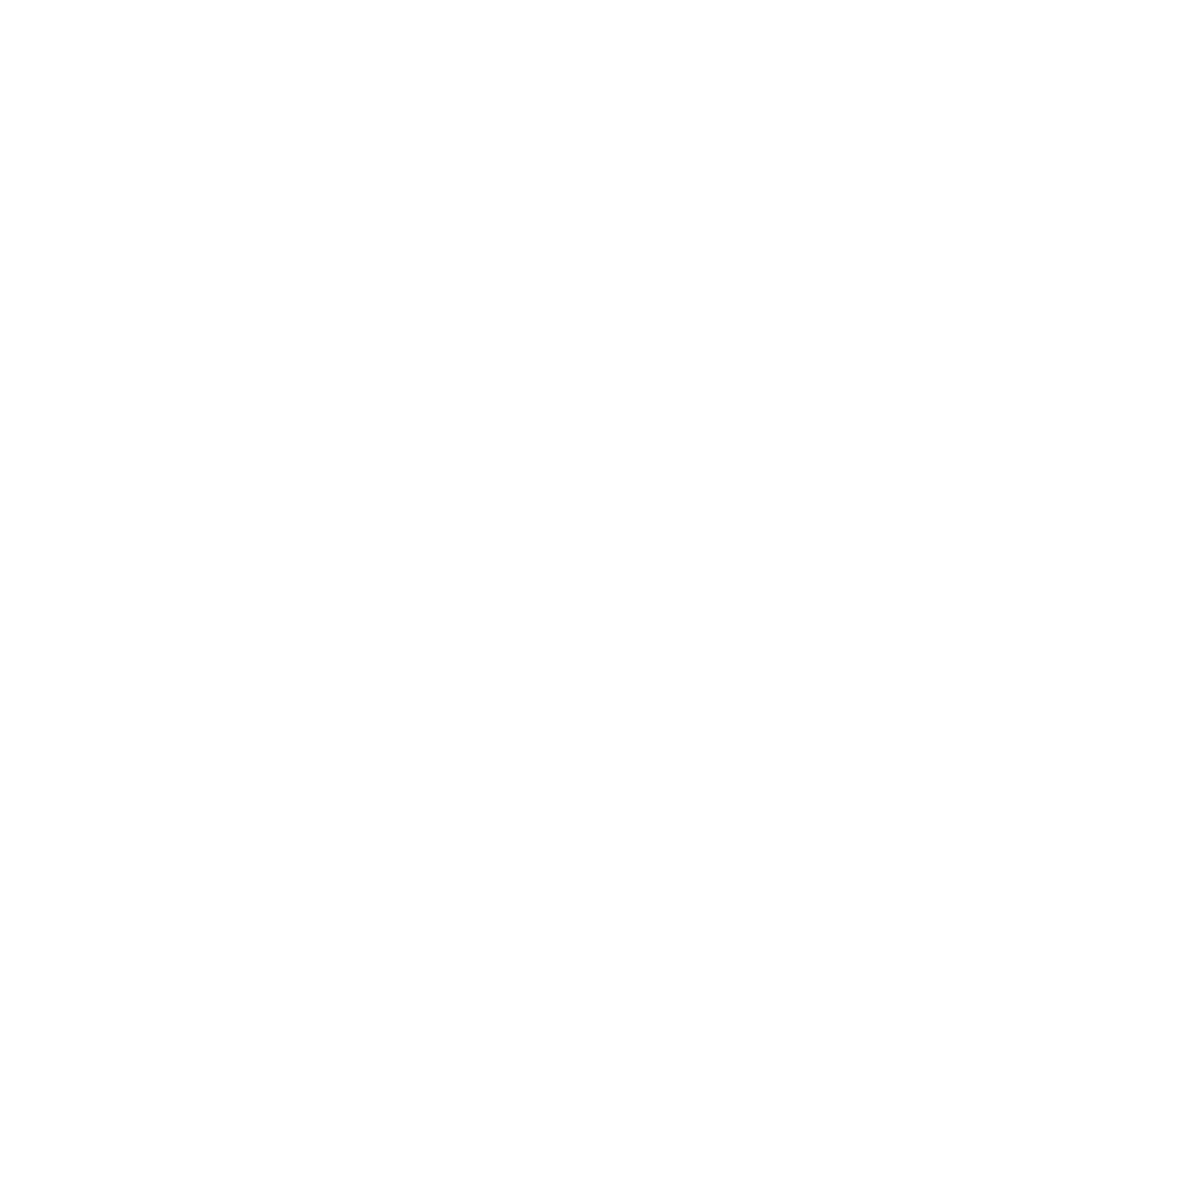

In [28]:
hfig2 = plt.figure(figsize=(12,12))
hfig2.set_tight_layout(1)

In [29]:
hfig2.clear()
ax = hfig2.subplots(3,4)
hfig2.suptitle("Std along frequency axis")
for i, title in enumerate(titles):
    if shist[i] is None:
        ax.flatten()[i].axis("off")
    else:
        ax.flatten()[i].plot(sxvals[i],shist[i], '.',color=col, markeredgecolor='k')
        ax.flatten()[i].step(sxvals[i],shist[i], where='mid',color=col, alpha=0.2)
        ax.flatten()[i].set(yscale='log', xlim=(0, None), title=title)

In [12]:
plt.close('all')